In [1]:
using HDF5
using PyCall
@pyimport matplotlib.animation as anim
using PyPlot
using Statistics
using Images

In [2]:
include("/Users/rzhoufias.uni-frankfurt.de/Documents/Code/PIV/multi_quickPIV/src/multi_quickPIV.jl")

Main.multi_quickPIV

In [3]:
include("/Users/rzhoufias.uni-frankfurt.de/Documents/Code/PIV/multiscale_multistep_filter.jl")

multiscale_multigrid_gradient_segment (generic function with 1 method)

In [4]:
using ImageAnalysis 

# Read .h5 single slice data

In [5]:
function read_h5(folder_path::String, data_name::String)
    h5open(folder_path, "r") do file
        read(file, data_name)
    end
end

read_h5 (generic function with 1 method)

In [6]:
file_path = "/Users/rzhoufias.uni-frankfurt.de/Documents/PhD_Franziska/Headon/featherbud_formation_chicken/headon_video1_layer0.h5"
periderm_img = Float32.(read_h5(file_path, "data"))

1024×1024×395 Array{Float16, 3}:
[:, :, 1] =
  53.0   90.0   65.0       97.0   64.0  …   46.0   41.0   47.0      34.0
  50.0   17.0   49.0       45.0   75.0      24.0   59.0  165.0      16.0
  26.0   35.0   19.0       29.0   19.0      49.0   55.0   25.0      58.0
  48.0   44.0   26.0       19.0   44.0      58.0   30.0   31.0      21.0
  44.0   41.0   53.0       77.0  661.0      36.0   61.0   70.0      32.0
  35.0  350.0   49.0       53.0   51.0  …   20.0   67.0   64.0      66.0
  56.0   53.0   24.0      449.0   44.0     307.0   28.0  601.0      37.0
  44.0   37.0    1.182e3   47.0   14.0      28.0  525.0   44.0      25.0
  94.0   31.0   67.0       90.0   33.0      35.0   51.0   30.0     630.0
  52.0   52.0   16.0       22.0   32.0      55.0   27.0   46.0      40.0
 669.0  186.0  176.0       82.0   33.0  …   21.0   55.0   33.0      35.0
  26.0   46.0   23.0       23.0   16.0      46.0   49.0   40.0     179.0
  44.0   47.0   66.0       59.0  402.0     428.0   59.0   14.0      57.0
   ⋮  

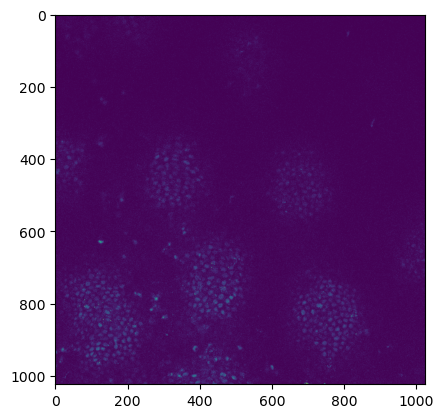

PyObject <matplotlib.image.AxesImage object at 0x1dc7e8ec0>

In [34]:
PyPlot.imshow(periderm_img[:,:,200])

# As for the PIV of Masenchym, also look at the time period of fream 0 - 200. 

This time period contains the main process of aggregate formation. Per observation with eyes, the periderm seems to flow mostly AP direction, with almost no rotation. 

Goal: Clear the AP flow of most of the time. And therefore also discover if there is rotation, or show there is rarly rotation. 
Method: Statistics of dot product between AP vector and PIV vector over time. Pseudo trajectory (? probably not quite useful because a lot of blanc space, but could try)

# Masking image.

Applied multiscale_multistep_filter, since there is a lot of blanck space, the aggregates (and cells in it) have to be extracted to avoid noise from background. Here, the filter would increase the PIV correctniss. 

There exists slight rotations, but not significant... How can I detect them :/ 

In [43]:
# parameter for multiscale multistep filter 
grid_sizes = ( (7,7), )
scales     = ( ((4,4),(2,2)), ) 
steps      = ( ((1,1),(4,4)), ) 

Δ_low = 3000
α = 1.5

img1 = periderm_img[:,:,150]
img2 = periderm_img[:,:,151]

# One possible filtering with multiscale_multistep filter. 
img1_out = multiscale_multistep_filter( Float32.( img1 ), grid_sizes=grid_sizes, scales=scales, steps=steps )
img1_mask1 = img1_out .> ( img1 .+ Δ_low ) .^ α

img2_out = multiscale_multistep_filter( Float32.( img2 ), grid_sizes=grid_sizes, scales=scales, steps=steps )
img2_mask1 = img2_out .> ( img1 .+ Δ_low ) .^ α

hi 
hi 


1024×1024 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

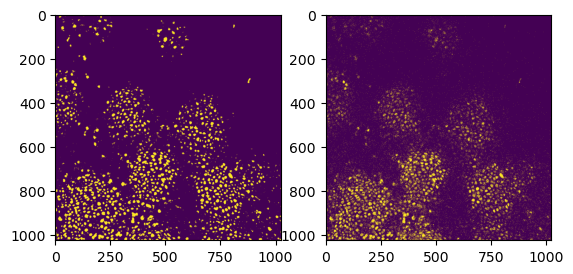

PyObject <matplotlib.image.AxesImage object at 0x1e214b470>

In [44]:
# simple filtering. 

img1_mask2 = img1 .>= 1500

subplot( 1, 2, 1 ); PyPlot.imshow(img1_mask1)
subplot(1, 2, 2); PyPlot.imshow(img1_mask2)

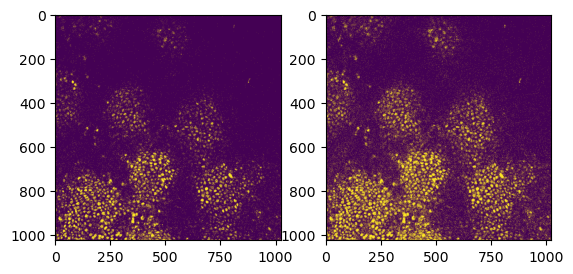

PyObject <matplotlib.image.AxesImage object at 0x1e3b5b470>

In [46]:
# Otsu threshold.

threshold = Images.otsu_threshold(img1)
img1_maskotsu = img1 .>= threshold

subplot( 1, 2, 1 ); PyPlot.imshow(img1_mask2)
subplot(1, 2, 2); PyPlot.imshow(img1_maskotsu)

# PIV on masked image

In [43]:
# Parameters for postprocessing
std_factor = 2
function postprocess(M::Matrix{Float16})
    meanM = Statistics.mean(M)
    stdM = Statistics.std(M)
    mask_M = M .<= meanM + std_factor * stdM
    M .*= mask_M
    return M
end

postprocess (generic function with 2 methods)

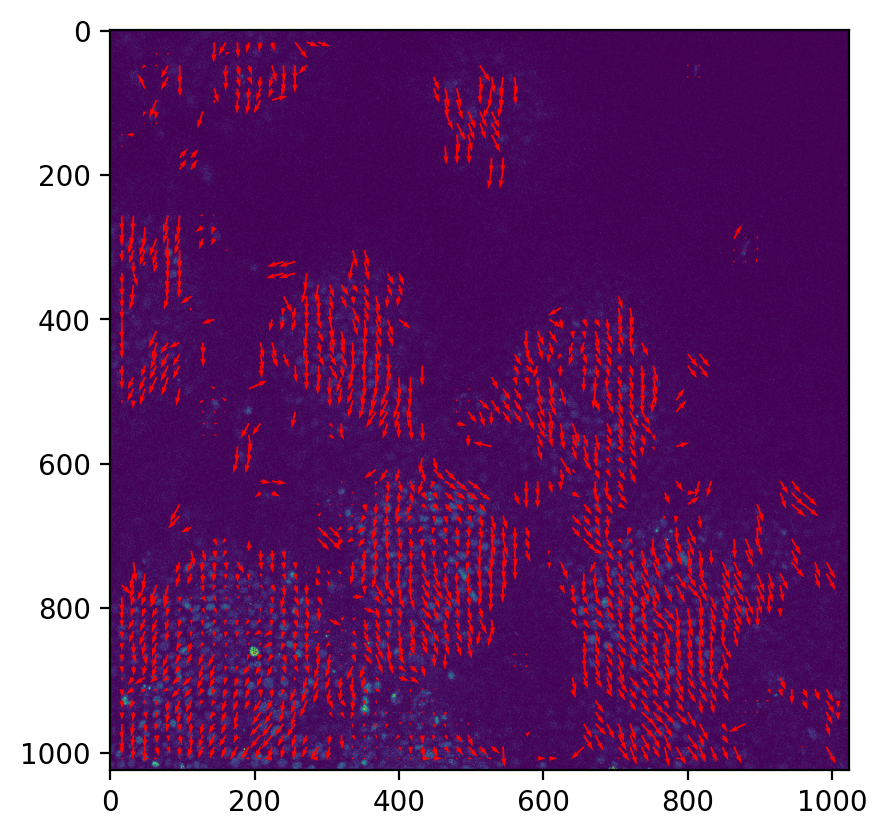

PyObject <matplotlib.quiver.Quiver object at 0x1e20e27b0>

In [45]:
# paramters for PIV analysis
pivparams = multi_quickPIV.setPIVParameters(interSize=(32, 32), searchMargin=(64, 64), step=(16, 16), computeSN = true)
IA = multi_quickPIV._isize(pivparams)
ST = multi_quickPIV._step(pivparams)


VF, SN = multi_quickPIV.PIV( img1_mask1, img2_mask1, pivparams, precision=16 )

U = VF[ 1, :, : ]
# U.*= ( SN .> 1 )
V = VF[ 2, :, : ]
# V.*= ( SN .> 1 )
M = sqrt.( U .^ 2 .+ V .^ 2 )# Magnitude of the vectors.

U[ M .> 5 ] .= NaN
V[ M .> 5 ] .= NaN

ygrid = [ ( y - 1 )*ST[1] + div( IA[1], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
xgrid = [ ( x - 1 )*ST[2] + div( IA[2], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]

PyPlot.figure( dpi=200 )
PyPlot.imshow( img1)
PyPlot.quiver( xgrid, ygrid, V, -U, color="red", scale=180)

# Generate PIV for multiple frames and generate the vector field. 

In [6]:
# Parameters for PIV
pivparams = multi_quickPIV.setPIVParameters(interSize=(32, 32), searchMargin=(64, 64), step=(16, 16)) #, computeSN = true)
IA = multi_quickPIV._isize(pivparams)
ST = multi_quickPIV._step(pivparams)
# Parameters for multiscale_multistep filter.
grid_sizes = ( (7,7), )
scales     = ( ((4,4),(2,2)), ) 
steps      = ( ((1,1),(4,4)), ) 

Δ_low = 3000
α = 1.5

function PIV_multiple_frame(t0, t1, data, filename)
# Function for generating PIV vector fields given start time t0 and end time t1 from given data. Final vector fields are stroing as .h5 files. 

    # The dataformate of stroing the vector fields later. 
    m_U = Matrix{Float32}[]
    m_V = Matrix{Float32}[]
    m_xgrid = Matrix{Float32}[]
    m_ygrid = Matrix{Float32}[]
    m_M = Matrix{Float32}[]

    # Iteration of PIV from t0 to t1. 
    for i in t0:t1
        
        # Taking images.
        img1 = data[:, :, i]
        img2 = data[:, :, i+1]
    
        
        # Multiscale Mask for the first and second images. 
        img1_out = multiscale_multistep_filter( Float32.( img1 ), grid_sizes=grid_sizes, scales=scales, steps=steps )
        img1_mask = img1_out .> ( img1 .+ Δ_low ) .^ α
        
        img2_out = multiscale_multistep_filter( Float32.( img2 ), grid_sizes=grid_sizes, scales=scales, steps=steps )
        img2_mask = img2_out .> ( img1 .+ Δ_low ) .^ α
        
        # Running PIV.
        VF, _ = multi_quickPIV.PIV( img1_mask, img2_mask, pivparams, precision=32 )
        
        U = VF[ 1, :, : ]
        V = VF[ 2, :, : ]
        M = sqrt.( U .^ 2 .+ V .^ 2 ) # Magnitude of the vectors.

        # Filtering out too long vectors manually. 
        U[ M .> 5 ] .= NaN
        V[ M .> 5 ] .= NaN
        
        ygrid = [ ( y - 1 )*ST[1] + div( IA[1], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
        xgrid = [ ( x - 1 )*ST[2] + div( IA[2], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
        
        push!(m_U, U)
        push!(m_V, V)
        push!(m_xgrid, xgrid)
        push!(m_ygrid, ygrid)
        push!(m_M, M)

        print(i)
    end

    # Converting dimensions with time.
    U_data = reduce((x,y) -> cat(x,y,dims=3), m_U)
    V_data = reduce((x,y) -> cat(x,y,dims=3), m_V)
    xgrid_data = reduce((x,y) -> cat(x,y,dims=3), m_xgrid)
    ygrid_data = reduce((x,y) -> cat(x,y,dims=3), m_ygrid)
    M_data = reduce((x,y) -> cat(x,y,dims=3), m_M)
    
    # Edit them into .h5 files. 
    h5open(filename, "w") do file
        write(file, "U", U_data)
        write(file, "V", V_data)
        write(file, "M", M_data)
        write(file, "x_grid", xgrid_data)
        write(file, "y_grid", ygrid_data)
    end
    
end


PIV_multiple_frame (generic function with 1 method)

In [7]:
# Data.
file_path = "/Users/rzhoufias.uni-frankfurt.de/Documents/PhD_Franziska/Headon/featherbud_formation_chicken/headon_video1_layer0.h5"
periderm_img = Float32.(read_h5(file_path, "data"))
# PIV.
PIV_multiple_frame(150, 200, periderm_img, "PIV_periderm_150-200")

hi 
hi 
150hi 
hi 
151hi 
hi 
152hi 
hi 
153hi 
hi 
154hi 
hi 
155hi 
hi 
156hi 
hi 
157hi 
hi 
158hi 
hi 
159hi 
hi 
160hi 
hi 
161hi 
hi 
162hi 
hi 
163hi 
hi 
164hi 
hi 
165hi 
hi 
166hi 
hi 
167hi 
hi 
168hi 
hi 
169hi 
hi 
170hi 
hi 
171hi 
hi 
172hi 
hi 
173hi 
hi 
174hi 
hi 
175hi 
hi 
176hi 
hi 
177hi 
hi 
178hi 
hi 
179hi 
hi 
180hi 
hi 
181hi 
hi 
182hi 
hi 
183hi 
hi 
184hi 
hi 
185hi 
hi 
186hi 
hi 
187hi 
hi 
188hi 
hi 
189hi 
hi 
190hi 
hi 
191hi 
hi 
192hi 
hi 
193hi 
hi 
194hi 
hi 
195hi 
hi 
196hi 
hi 
197hi 
hi 
198hi 
hi 
199hi 
hi 
200